<h2>Unsupervised Learning</h2>

- Operats on tasks without labeled responses or target values

**Goal:**
    - capture intersting structure or information
    
**Some Applications**
- visualize structures of a complex dataset
- density estimation to predict probabilities of events
- compress and summerize the data
- extract features for suprevised learning
- discover important clusters or outliers

<h3>Two major types of unspuervised learning methods:</h3>

**Transformations**: processes that extract or compute information
    - Dimensionality reduction: 

**Clustering**: find groups in the data    
    - Densiy estimation: kernel density for heat map plot of geospatial data
    

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [48]:
# load cancer data
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

# losd fruits dataset
def load_fruit_dataset():
    fruits = pd.read_table('/Users/AD/Downloads/fruit_data_with_colors.txt')
    feature_names_fruits = ['height', 'width', 'mass', 'color_score']
    X_fruits = fruits[feature_names_fruits]
    y_fruits = fruits['fruit_label']
    target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
    
    X_fruits_2d = fruits[['height', 'width']]
    y_fruits_2d = fruits['fruit_label']
    
    return (X_fruits, y_fruits, X_fruits_2d, y_fruits_2d)


<h2>DImensionality Reduction and Manifold Learning</h2>

<h3>Principal Componenets Analysis (PCA)</h3>

- will lead to better estimation of the high dimensional original data into lower dimenstion by projecting dafa along the high variance axis(principal component)

- used for exploring and visualizing dataset to understnad grouping
- visualized using 2D scatter plot
- used for compresssion, finding features for supervised learning

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standaedize features
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

# apply PCA
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print("Before damension: {} \nAfter PCA transformation: {}"
     .format(X_cancer.shape, X_pca.shape))

Before damension: (569, 30) 
After PCA transformation: (569, 2)


In [18]:
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

<IPython.core.display.Javascript object>


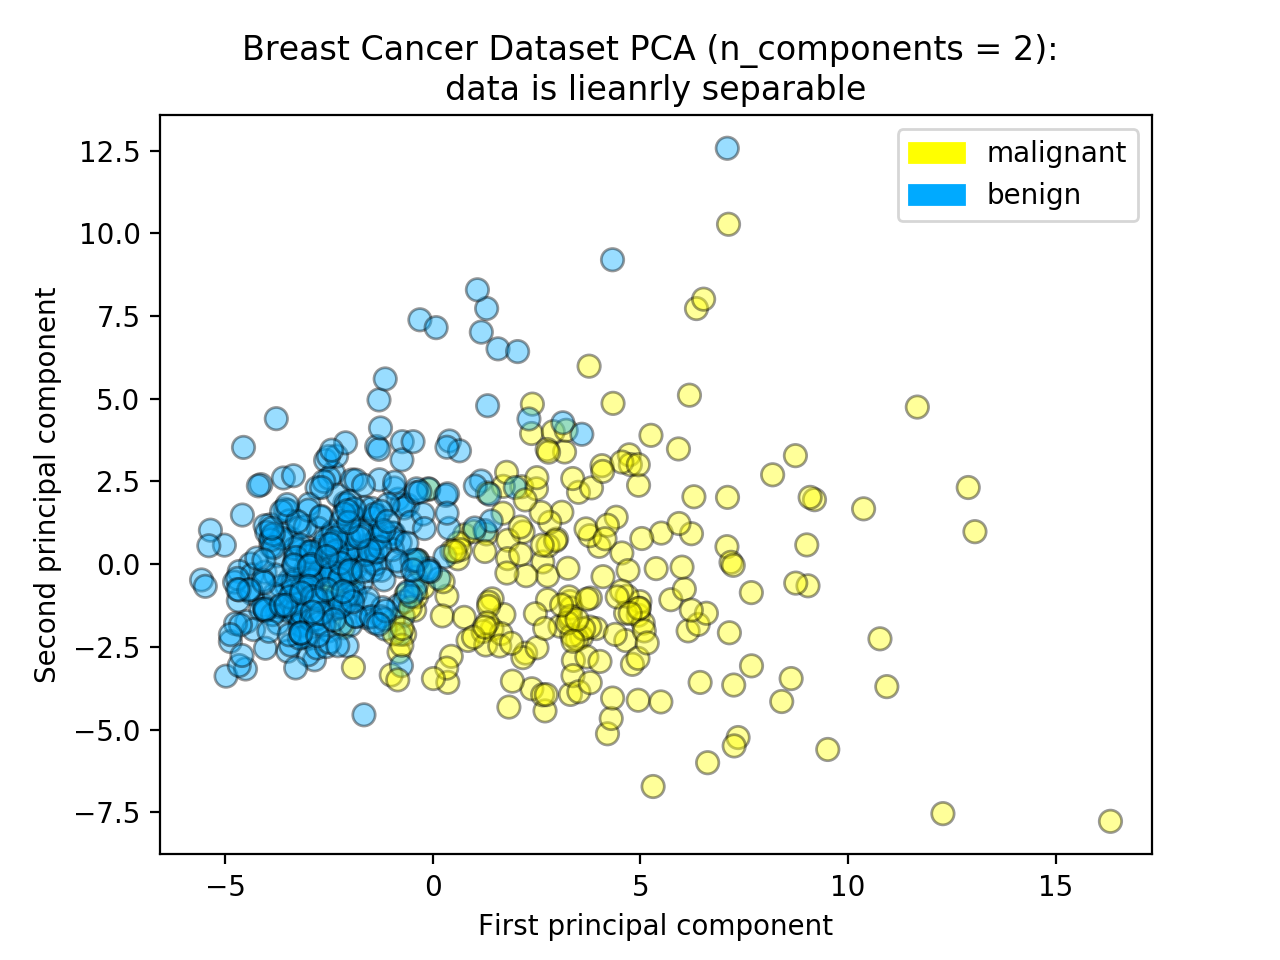

In [23]:
# visualize cancer dataset
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2): \ndata is lieanrly separable');

**Plotting magnitue of the two principal components**

<IPython.core.display.Javascript object>


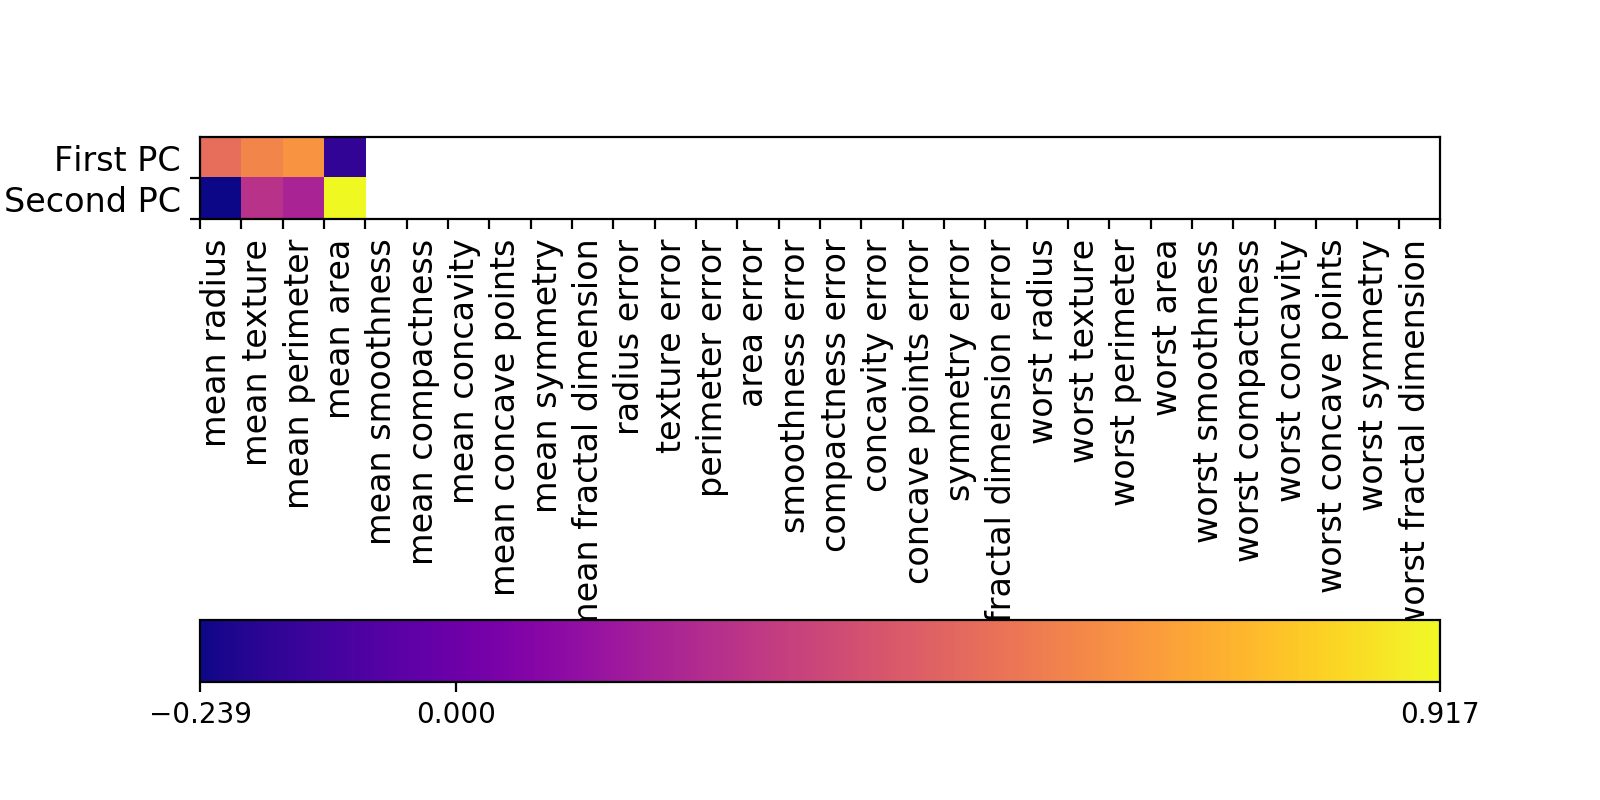

In [57]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

PCA on Fruit dataset

<IPython.core.display.Javascript object>


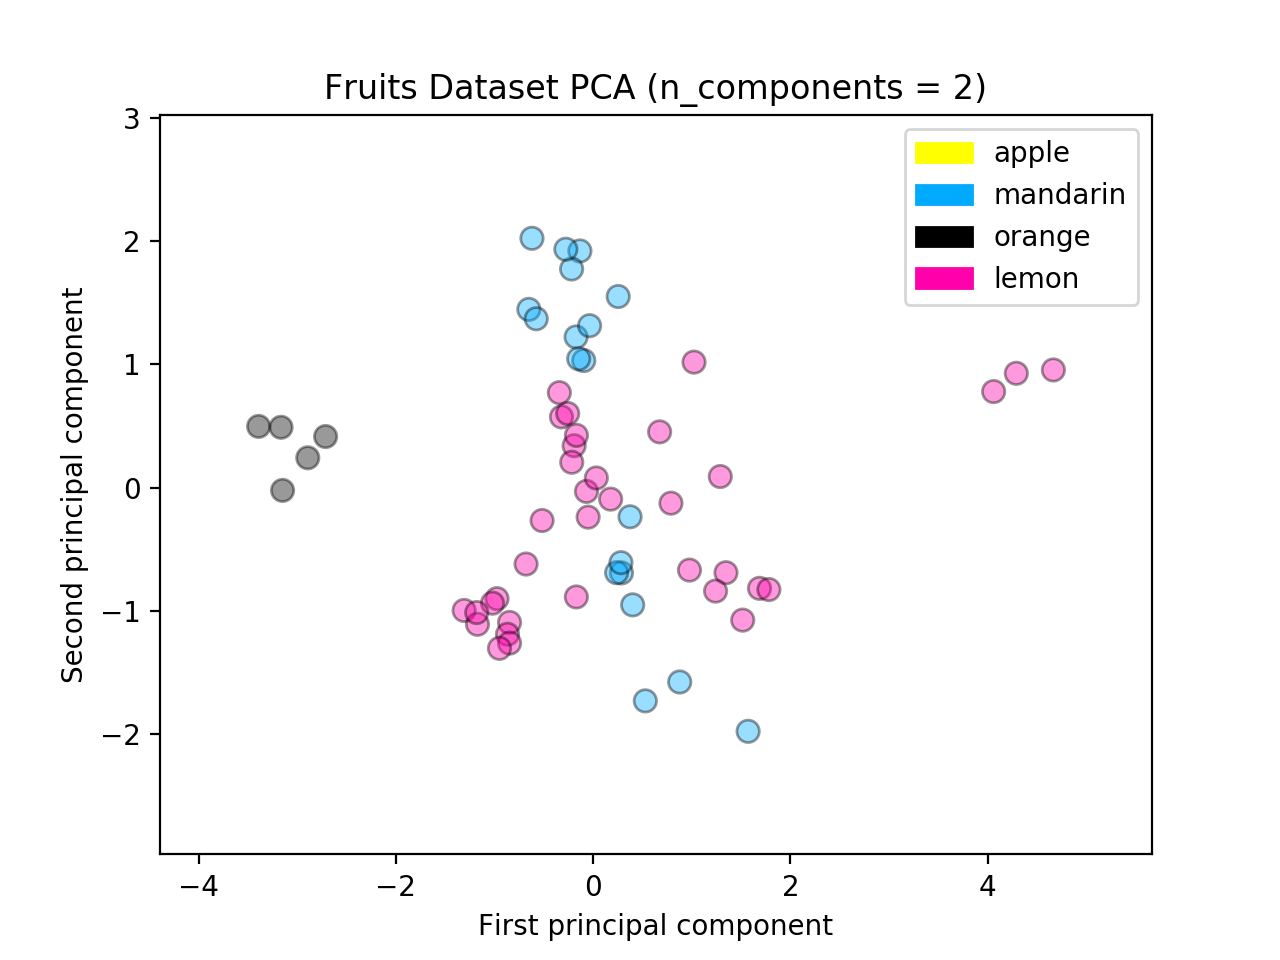

In [50]:
X_fruits, y_fruits, X_fruits_2d, y_fruits_2d = load_fruit_dataset()

# standardize features
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)

# PCA
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
plot_labelled_scatter(X_pca, y_fruits, 
                      ['apple','mandarin','orange','lemon'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

<h3>Manifold learning methods</h3>

- PCA is not effective for for data with manifolds

Multidimensional sacaling(MDS) on the fruit dataset

<IPython.core.display.Javascript object>


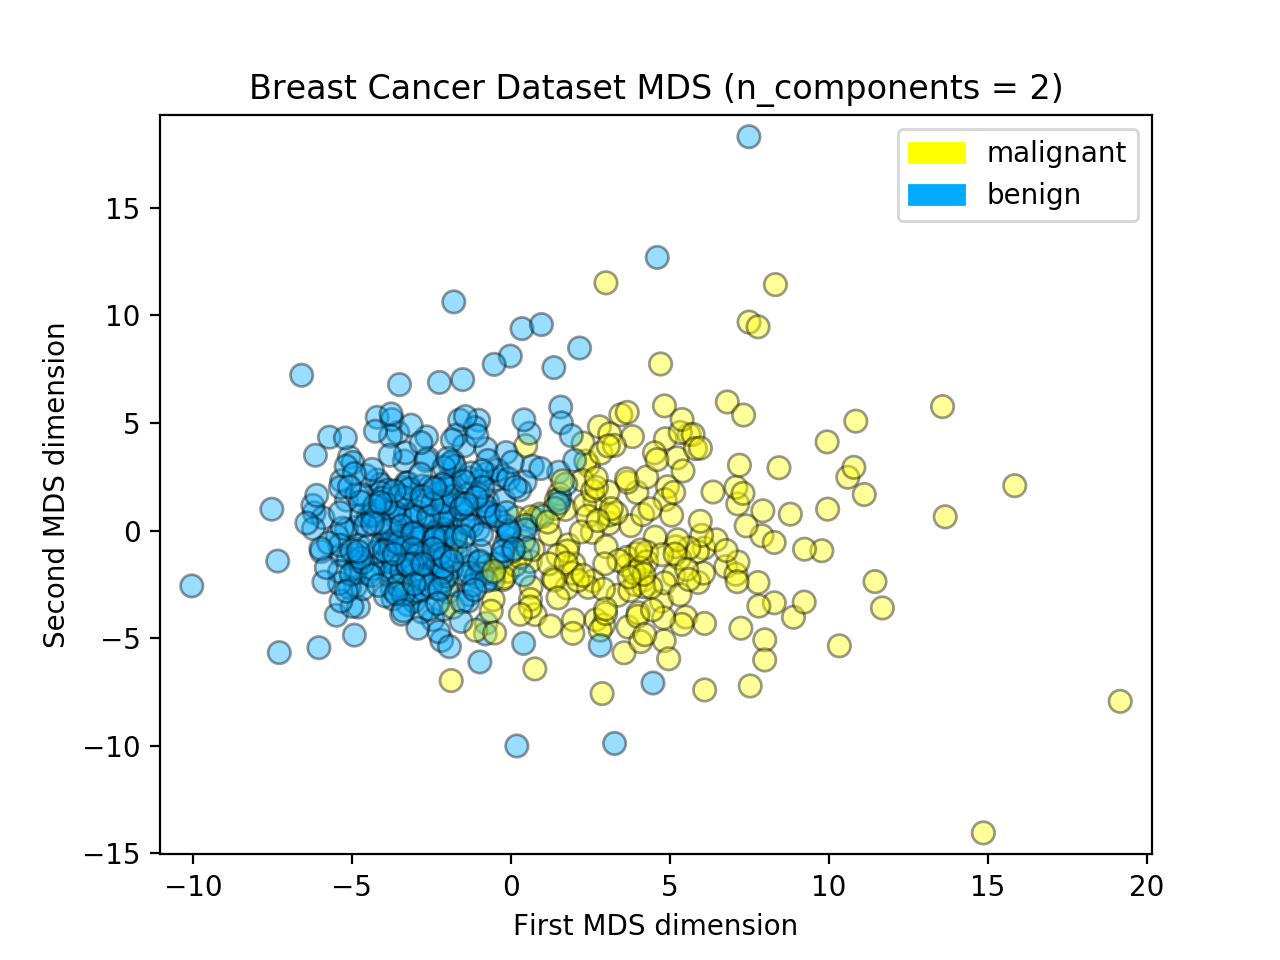

In [60]:
from sklearn.manifold import MDS

# normalize cancer data
X_norm = StandardScaler().fit(X_cancer).transform(X_cancer)

mds = MDS(n_components = 2)
X_mds = mds.fit_transform(X_norm)
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

<h3>t-SNE on the fruit dataset</h3>

<IPython.core.display.Javascript object>


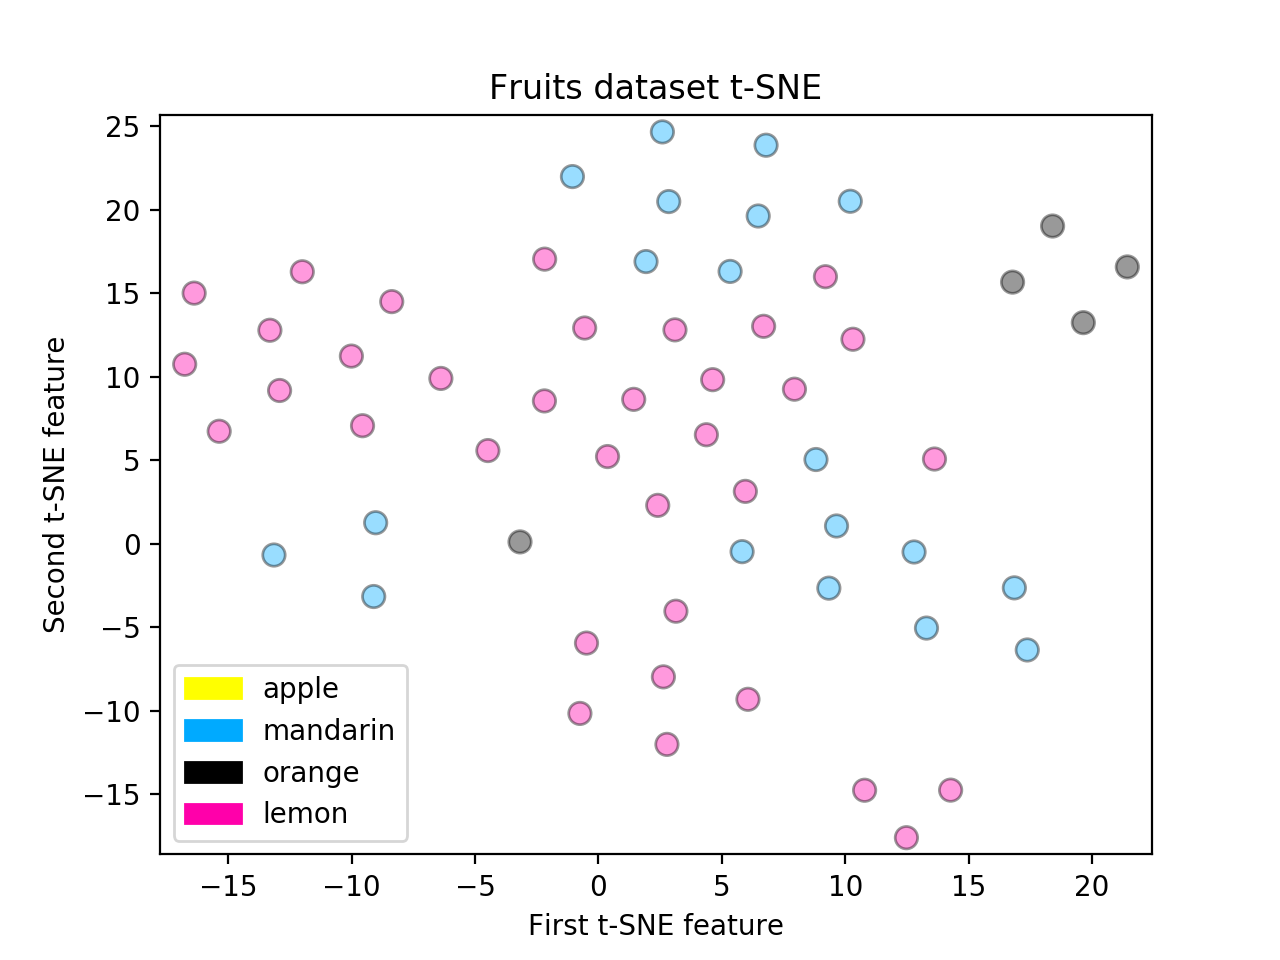

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)
X_tsne = tsne.fit_transform(X_normalized)
plot_labelled_scatter(X_tsne, y_fruits,
                           ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

<IPython.core.display.Javascript object>


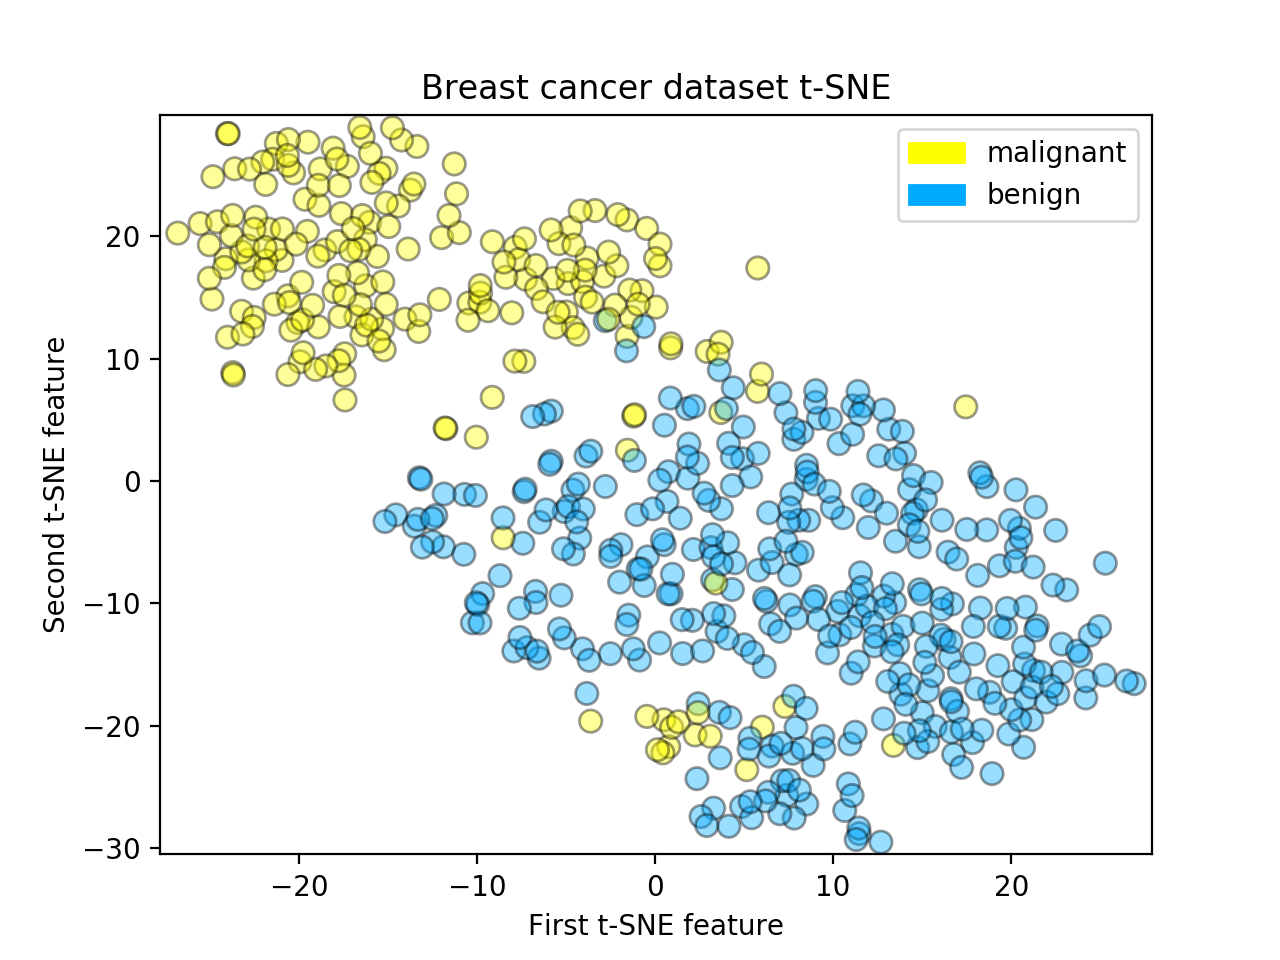

In [66]:
# t-SNE on the breast cancer dataset
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_norm )

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

<h2>Clustering</h2>

- finding a way to divide a dataset into groups `clusters`
- cluster algorithm output a cluster membership index for each datapoint
    - haard cluster: each data point belongs to exactly one cluster
    - soft (or fuzzy) clustering: each data point ins assigned a weight, score or probability of membership for each cluster

**K-means**

   - works well for simple cluster of same size
   - variant of `k-means` like `k=medoids` can work on categorical features

<IPython.core.display.Javascript object>


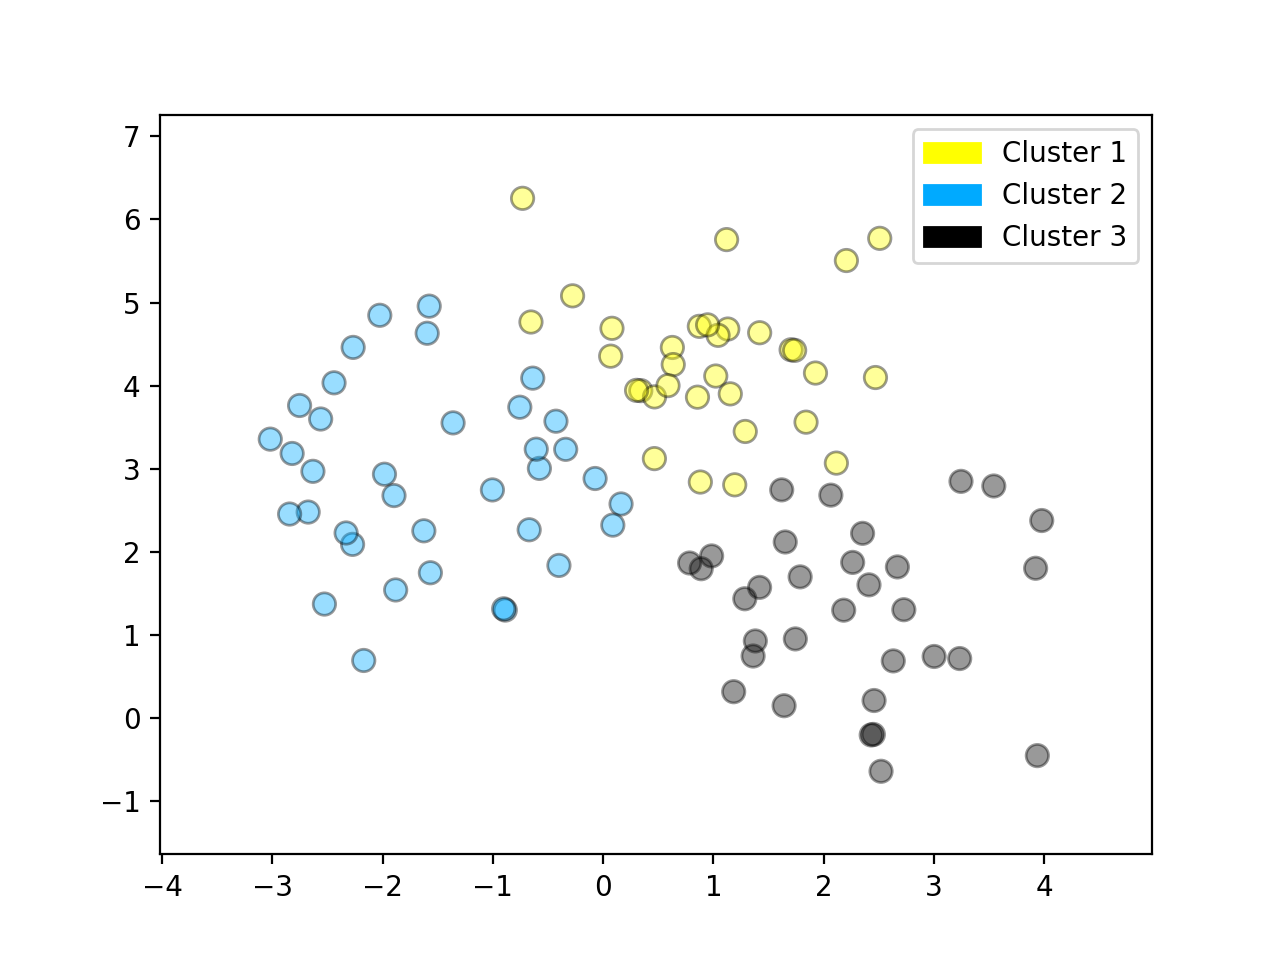

In [67]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, Y = make_blobs(random_state=0)

k_means = KMeans(n_clusters=3)
k_means.fit(X)

plot_labelled_scatter(X, k_means.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

<IPython.core.display.Javascript object>


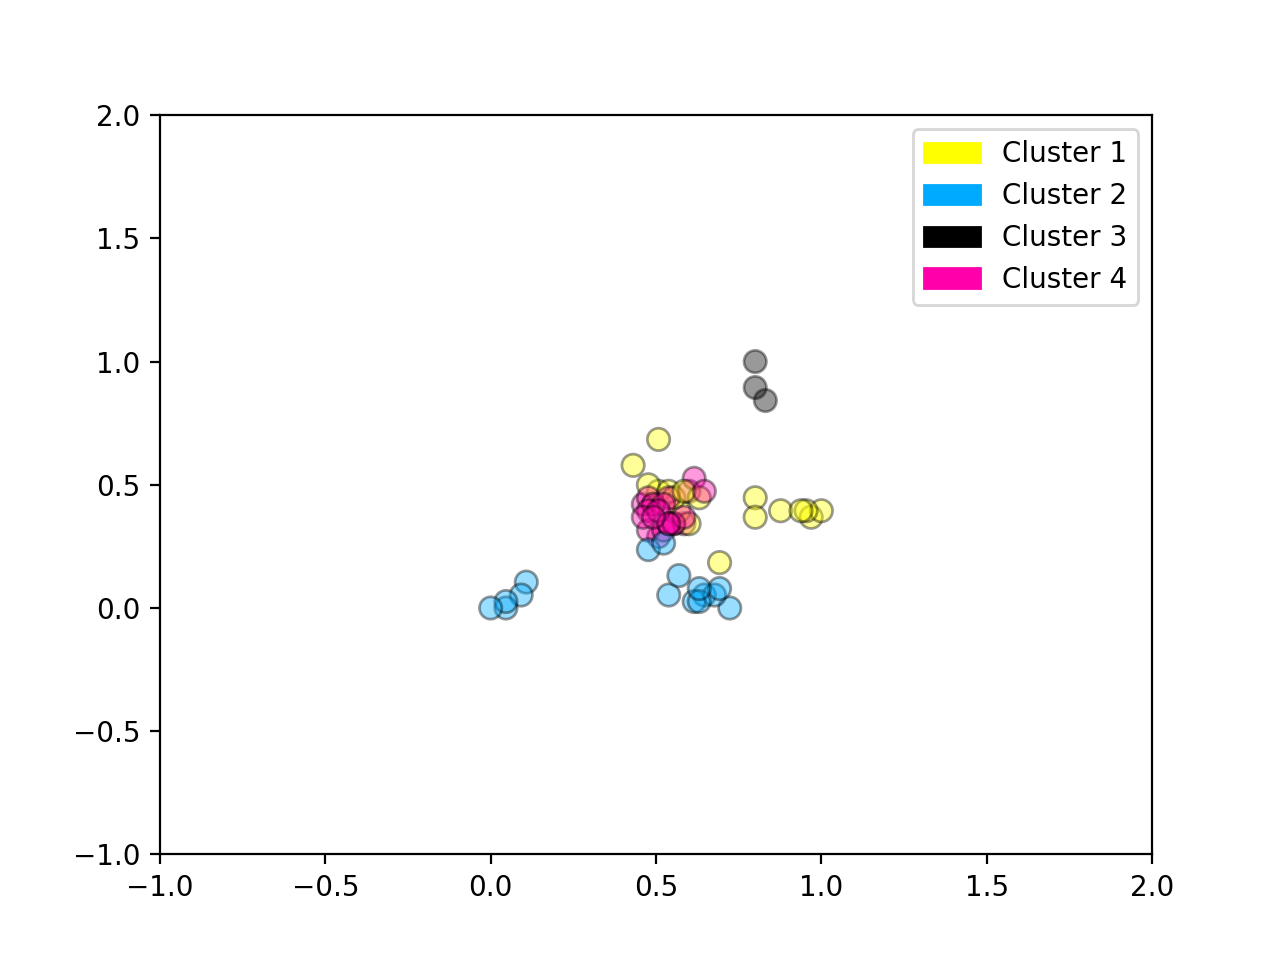

In [75]:
from sklearn.preprocessing import MinMaxScaler
X_fruits, y_fruits, X_fruits_2d, y_fruits_2d = load_fruit_dataset()

# usinf the Fruits datasets
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(X_fruits_normalized)
plot_labelled_scatter(X_fruits_normalized, k_means.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

**Agglomerative Clustering**

 - grouping is done by specifiying linekage criteri in `Sickit Learn`
     - `Ward's` method: least increase in total variance
     - `Average linkage`: average distance between clusters
     - `Complete linkage`: maximum distance between clusters

<IPython.core.display.Javascript object>


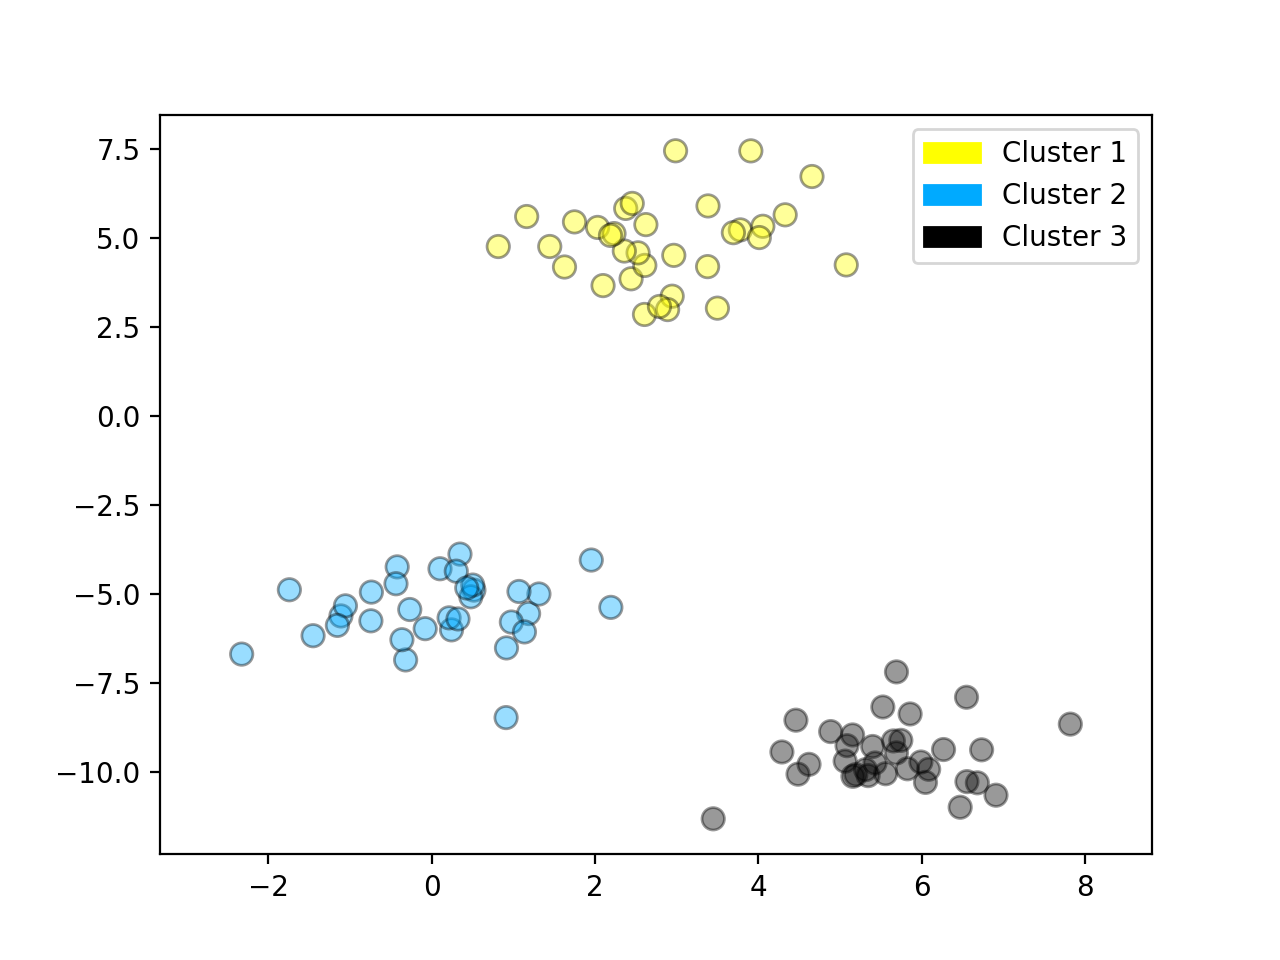

In [76]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

**Creating a dendrogram (using Scipy)**

<IPython.core.display.Javascript object>


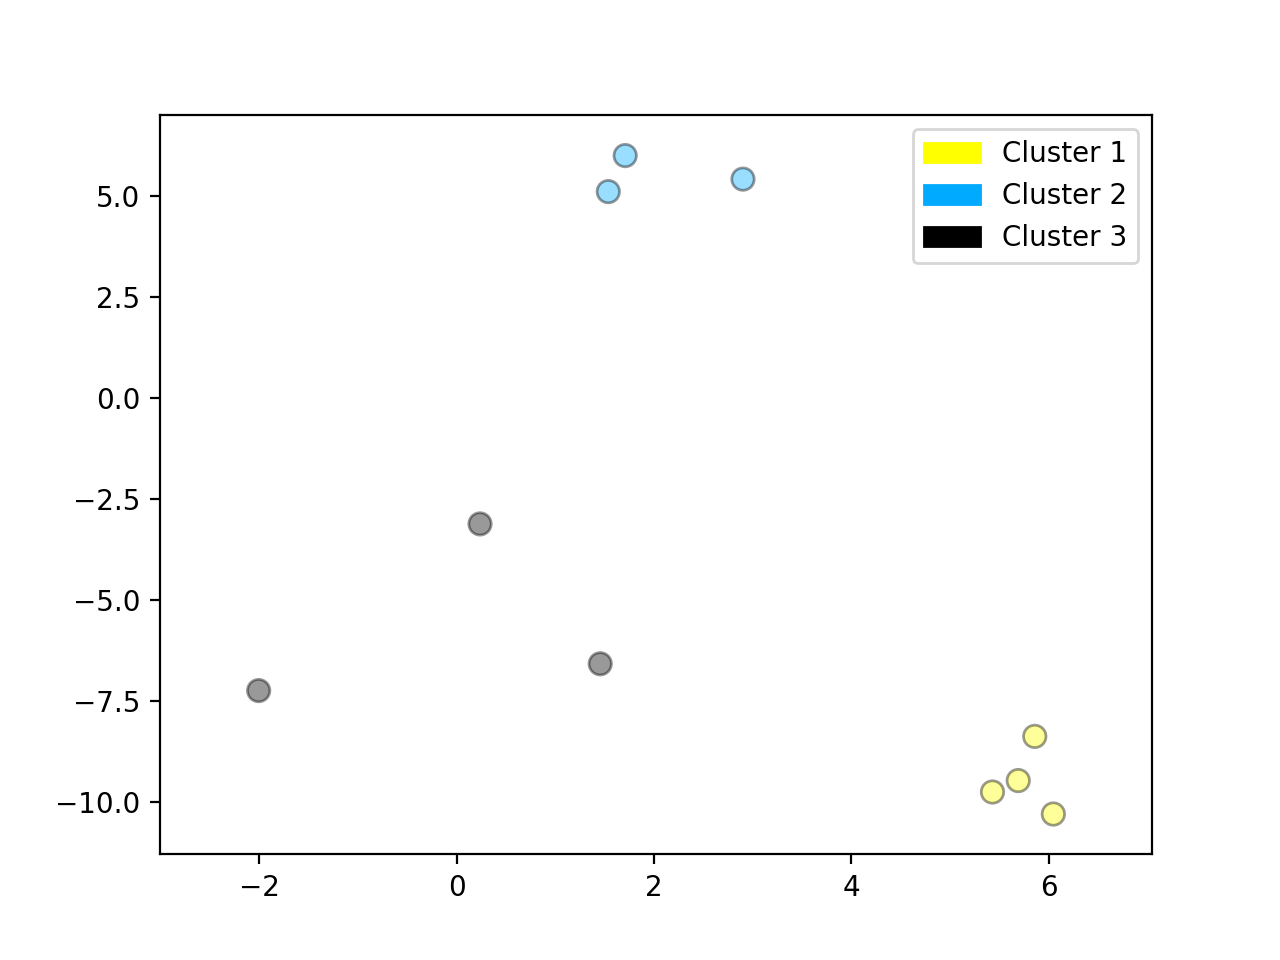

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [77]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

<IPython.core.display.Javascript object>


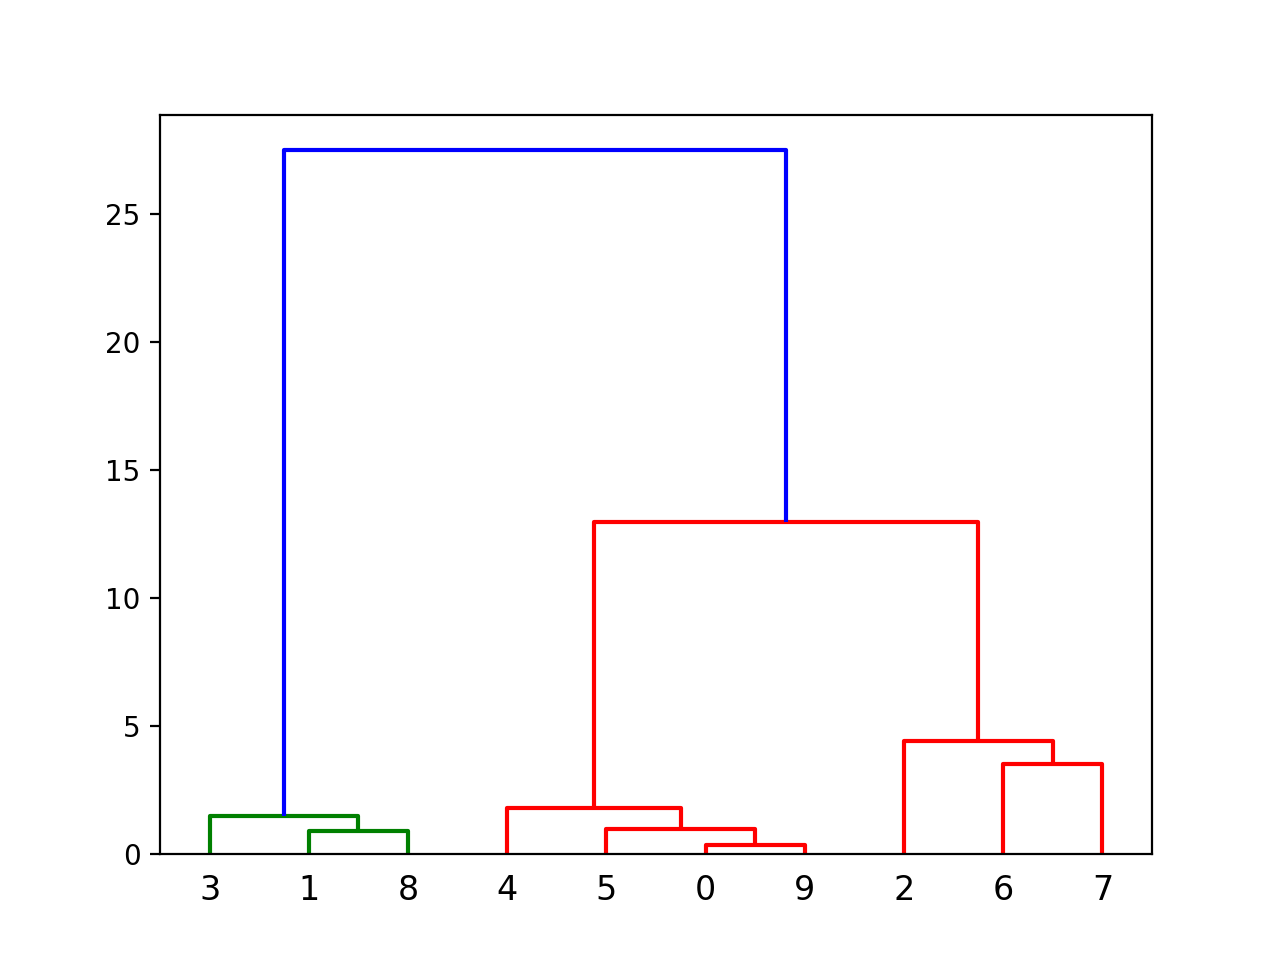

In [78]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

**DBSCAN**

- unlike k-means, no need to specify number of clusters
- can be used for large datasets
- identify liely noise points

<IPython.core.display.Javascript object>


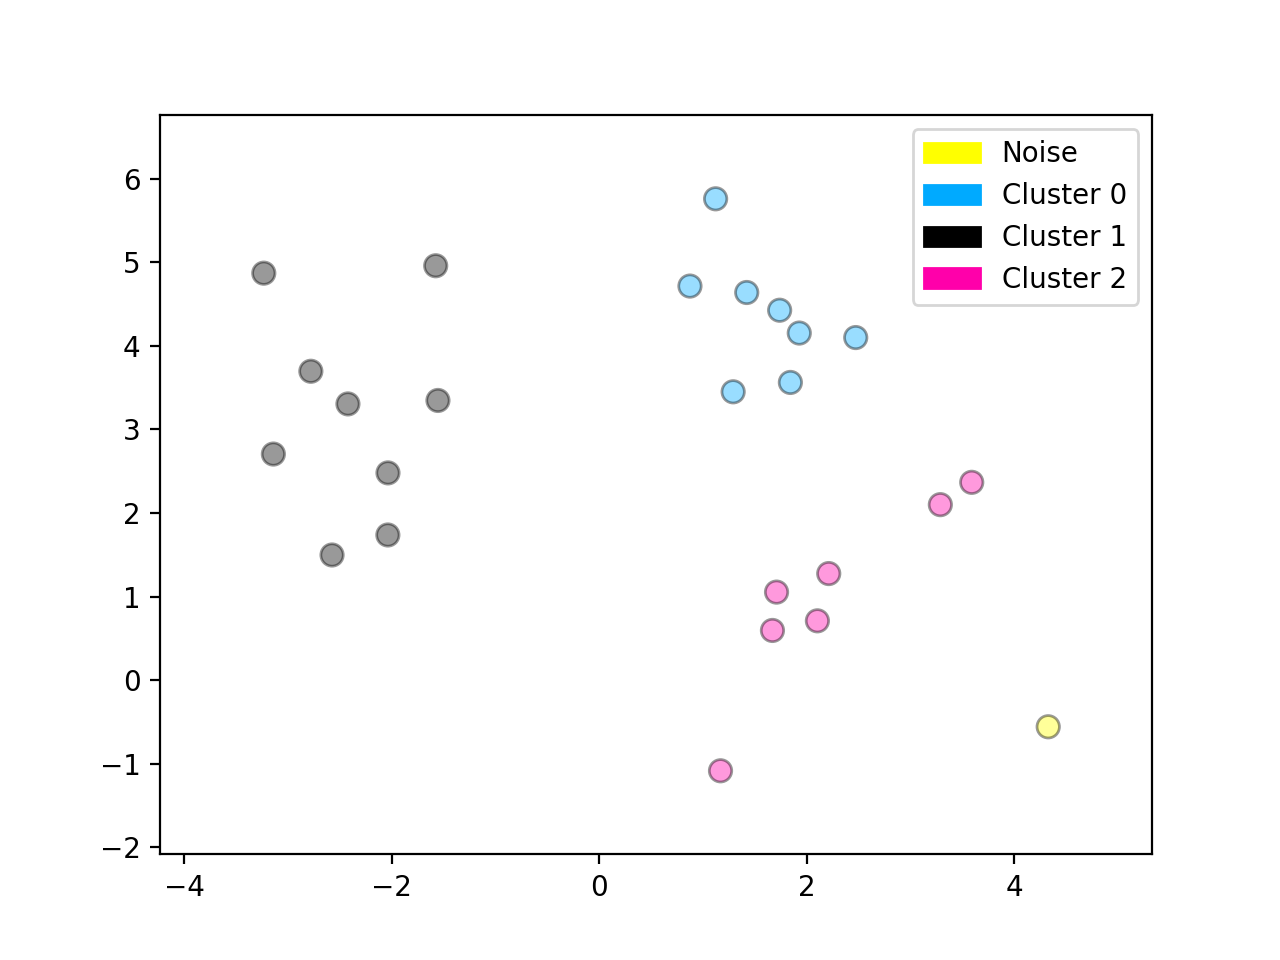

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.datasets  import make_blobs

X, y = make_blobs(random_state=0, n_samples=25)

dbscan = DBSCAN(eps= 2, min_samples=2)
cls = dbscan.fit_predict(X)
plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

Note: This tutorial took significant inspiration from the from `Applied Machine Learning in Python` by Mchicagan State on Coursera